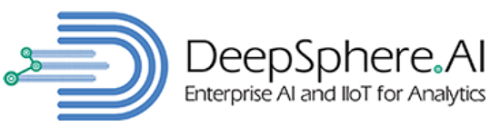

# ***Disclaimer***



DeepSphere.AI developed these materials based on its team’s expertise and technical infrastructure, and we are sharing these materials strictly for learning and research. These learning resources may not work on other learning infrastructures and DeepSphere.AI advises the learners to use these materials at their own risk. As needed, we will be changing these materials without any notification and we have full ownership and accountability to make any change to these materials.


#***Copyright Notice***


Local and international copyright laws protect this material. 
Repurposing or reproducing this material without written approval from DeepSphere.AI violates the law.
                    
                                        © DeepSphere.AI | Confidential and Proprietary


#***Implement forward and backward pass in RNN***

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Source  - https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/data?select=Tesla.csv+-+Tesla.csv.csv

In [3]:
vAR_filepath = r'/content/drive/MyDrive/Introduction_to_Deep_Learning/Unit8/Tesla.csv'
# Read Input data
vAR_df=pd.read_csv(vAR_filepath)

In [4]:
vAR_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [5]:
vAR_df_Train = vAR_df[0:1600]
vAR_df_test = vAR_df[1600:]

In [6]:
vAR_train = vAR_df_Train.iloc[:, 4:5].values
vAR_test_actual = vAR_df_test.iloc[:, 4:5].values

In [7]:
######NORmalizing the train values 

from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler(feature_range = (0, 1))
vAR_training = mm_sc.fit_transform(vAR_train)

In [8]:
vAR_X_train = []
vAR_y_train = []
for i in range(60, 1600):
    vAR_X_train.append(vAR_training[i-60:i, 0])
    vAR_y_train.append(vAR_training[i, 0])
vAR_X_train, vAR_y_train = np.array(vAR_X_train), np.array(vAR_y_train)


In [9]:
vAR_X_train = np.reshape(vAR_X_train, (vAR_X_train.shape[0], vAR_X_train.shape[1], 1))


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout

In [11]:

Tesla_Stock_pred = Sequential()

Tesla_Stock_pred.add(SimpleRNN(units = 60, input_shape = (vAR_X_train.shape[1], 1)))
Tesla_Stock_pred.add(Dropout(0.1))

Tesla_Stock_pred.add(Dense(units = 1))

Tesla_Stock_pred.compile(optimizer = 'adam', loss = 'mean_squared_error')
##Training the model 
Tesla_Stock_pred.fit(vAR_X_train, vAR_y_train, epochs = 15, batch_size = 16)

Epoch 1/15
97/97 [==============================] - 2s 12ms/step - loss: 0.0625
Epoch 2/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0062
Epoch 3/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0037
Epoch 4/15
97/97 [==============================] - 1s 11ms/step - loss: 0.0027
Epoch 5/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 6/15
97/97 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 7/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 8/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 9/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 10/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 11/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 12/15
97/97 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 13/15
97/97 [==================

In [12]:
vAR_test_head = vAR_train[-60:]
vAR_Test = np.concatenate((vAR_test_head,vAR_test_actual), axis=0)


In [13]:
vAR_Test = mm_sc.transform(vAR_Test)
vAR_X_test = []
for i in range(60, 152):
    vAR_X_test.append(vAR_Test[i-60:i, 0])
vAR_X_test = np.array(vAR_X_test)

In [14]:
vAR_X_test = np.reshape(vAR_X_test, (vAR_X_test.shape[0], vAR_X_test.shape[1], 1))


In [15]:
vAR_y_pred = Tesla_Stock_pred.predict(vAR_X_test)
vAR_y_pred = mm_sc.inverse_transform(vAR_y_pred)

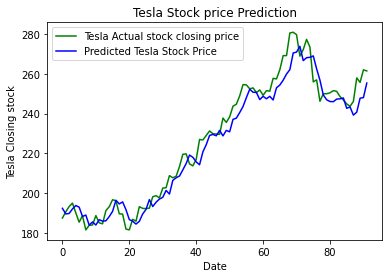

In [16]:
import matplotlib.pyplot as plt

plt.plot(vAR_test_actual, color = 'Green', label = 'Tesla Actual stock closing price')
plt.plot(vAR_y_pred, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Closing stock')
plt.legend()
plt.show()